# PURPOSE
* The purpose of this notebook is to model two OLS regression models.  Model 1 is properly specified based on the toy data and Model 2 has an omitted variable, $x_3$.
* This notebook will demonstrate why $R^2$ is a deceptive metric.
* RMSE metric and residual plots are better model diagnostic tools than $R^2$
* Brandon Johnson

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
N = 100

In [40]:
x1 = np.linspace(-500,500,N) + np.random.randn(N)*20 + 5
x2 = np.linspace(-10,300,N) + np.random.randn(N)*2 + 2
x3 = x2**2 + np.random.randn(N)*20 + 2
y = 100 + 10*x1 + 3*x2 + 20*x3 + np.random.randn(N)*2

In [41]:
df = pd.DataFrame(np.column_stack((x1,x2,x3,y)), columns=['x1','x2','x3','y'])
df.head()

,x1,x2,x3,y
0,-522.481424,-7.904640,91.831230,-3315.450339
1,-502.630130,-3.057557,-16.690433,-5268.998212
2,-484.510360,-2.999738,6.731997,-4616.750919
3,-492.439930,-0.190578,-5.218488,-4931.101123
4,-433.582146,6.916513,34.385054,-3527.067790


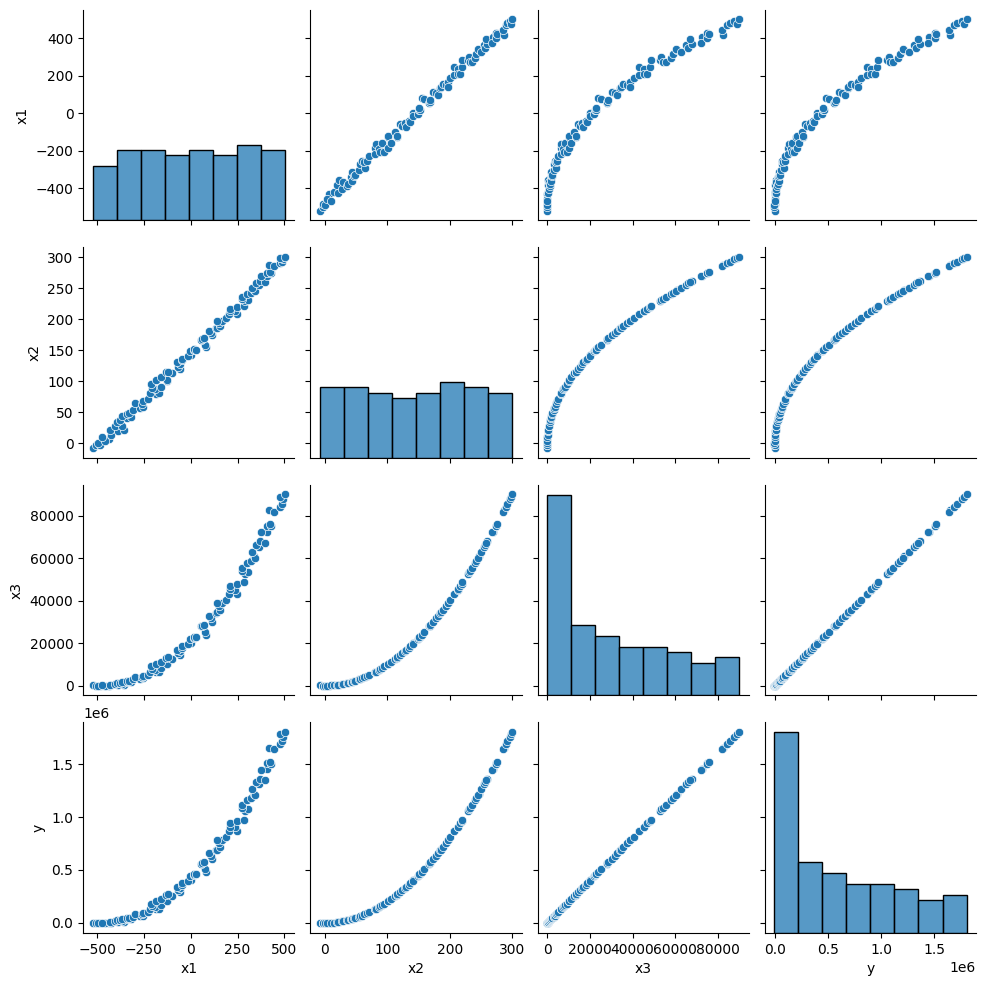

In [42]:
sns.pairplot(df)
plt.show()

**CORRECT MODEL**

In [46]:
model_1 = sm.OLS(endog=df.y.values, exog=sm.add_constant(df.drop('y',axis=1).values)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.651e+12
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:48:12   Log-Likelihood:                -207.05
No. Observations:                 100   AIC:                             422.1
Df Residuals:                      96   BIC:                             432.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.7447      4.669     22.864      0.000      97.478     116.012
x1            10.0139      0.010   1040.612      0.000       9.995      10.033
x2             2.9547      0.034     87.899      0.000       2.888       3.021
x3            20.0000   2.72e-05   7.35e+05      0.000      20.000      20.000
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.425
Skew:                          -0.055   Prob(JB):                        0.809
Kurtosis:                       2.700   Cond. No.                     9.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**RMSE**

In [50]:
rmse1 = np.sqrt(np.sum(model_1.resid**2))
rmse1

19.184753873611815

**OMITTED VARIABLE MODEL**

In [47]:
model_2 = sm.OLS(endog=df.y.values, exog=sm.add_constant(df.drop(['y','x3'],axis=1).values)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     664.9
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           2.35e-57
Time:                        16:48:14   Log-Likelihood:                -1329.6
No. Observations:                 100   AIC:                             2665.
Df Residuals:                      97   BIC:                             2673.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.513e+05    3.4e+05     -2.209      0.030   -1.43e+06   -7.64e+04
x1         -1006.7158    710.950     -1.416      0.160   -2417.755     404.324
x2          9190.4086   2329.703      3.945      0.000    4566.594    1.38e+04
==============================================================================
Omnibus:                       13.386   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.866
Skew:                           0.590   Prob(JB):                       0.0119
Kurtosis:                       2.141   Cond. No.                     7.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**RMSE**

In [51]:
rmse2 = np.sqrt(np.sum(model_2.resid**2)) 
rmse2

1439670.4872217213

### RESIDUALS

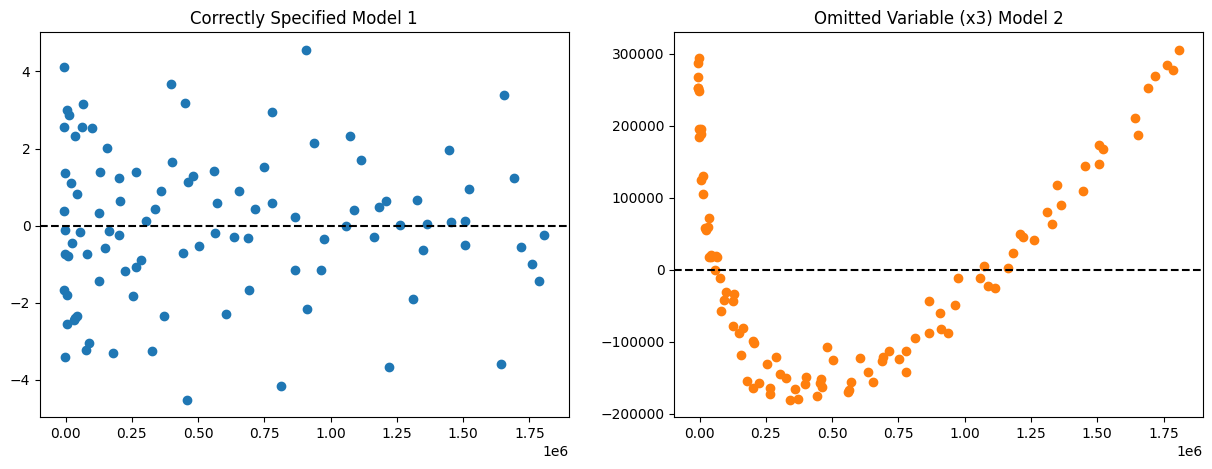

In [53]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

resids = [model_1.resid,model_2.resid]
titles = ['Correctly Specified Model 1','Omitted Variable (x3) Model 2']
colors = ['tab:blue','tab:orange']

for i,ax in enumerate(axs.flatten()):
    ax.scatter(y,resids[i],c=colors[i])
    ax.axhline(0,c='k',ls='--')
    ax.set_title(titles[i])